In [301]:
import numpy as np
import matplotlib.pyplot as plt
import gauss_quad_lib 
import element_lib
from mpl_toolkits.mplot3d import Axes3D
plt.rcdefaults()

# set the axes color glbally for all plots

plt.rcParams.update({'axes.facecolor':'white'})

In [302]:
N= 50
[a,b,c,d] = [0,1,0,1]
di = (b-a)/N
dj = (d-c)/N
root = [0,0]

In [303]:
nut = np.zeros( ((N+1)*(N+1), 2))
for i in range(0,N+1):
    for j in range(0,N+1):
        id = int( (N+1)*j+i)
        nut[id] = [di*i + root[0], dj*j + root[1]] 

In [304]:
so_tam_giac = N*N*4
triangle = np.zeros((so_tam_giac,3))
for i in range(0,N):
    for j in range(0,N):
        id1 = int(i*(N+1) + j)
        id2 = int(i*(N+1) + j+1)
        id3 = int((i+1)*(N+1) + j)
        id4 = int((i+1)*(N+1) + j+1)
        triangle[2*(N*i + j)] = [id1,id3,id4]
        triangle[2*(N*i+j)+1] = [id1,id2,id4]

In [305]:
#set Dirichlet nut
so_nut = (N+1)**2
Dirichlet = np.zeros(so_nut)  #dang boolean
val_Dirichlet = np.zeros(so_nut) #gia tri khoi tao

independ_re_index = np.zeros(so_nut)     # danh so lai cho nut doc lap
run = 0
for i in range(0, so_nut):
    if(i%(N+1)==0 or i%(N+1)==N or i<=N or i>=N*(N+1)):
        Dirichlet[i] = 1
        val_Dirichlet[i] = 0
    else: 
        independ_re_index[i] = int(run)
        run +=1
Global_matrix_vt = np.zeros((run, run))


In [306]:

for i in range(0, so_tam_giac):
    for j in range(0, 3):
        p1 = int(triangle[i][j])
        for k in range(j+1,3):
            p2 = int(triangle[i][k])
            p3 = 100
            if(j==0 and k== 1):
                p3 = int(triangle[i][2])
            if(j==0 and k== 2):
                p3 = int(triangle[i][1])
            if(j==1 and k== 2):
                p3 = int(triangle[i][0])    
            if(Dirichlet[p1]==0 and Dirichlet[p2]==0):
                q1 = int(independ_re_index[p1])
                q2 = int(independ_re_index[p2])                
                val= element_lib.Element_Stiff(nut[p1][0],nut[p1][1],
                                                                       nut[p2][0],nut[p2][1],
                                                                     nut[p3][0],nut[p3][1])
                Global_matrix_vt[q1][q2] +=val
                Global_matrix_vt[q2][q1] +=val
            

In [307]:
for i in range(0, so_tam_giac):
    for j in range(0, 3):
        p1 = int(triangle[i][j])
        if(Dirichlet[p1]==0):
            p2=0
            p3=0
            if(j==0):
                p2 = int(triangle[i][1])  
                p3 = int(triangle[i][2])  
            if(j==1):
                p2 = int(triangle[i][0])  
                p3 = int(triangle[i][2]) 
            if(j==2):
                p2 = int(triangle[i][1])  
                p3 = int(triangle[i][0])     
            val= element_lib.Element_Stiff_self(nut[p1][0],nut[p1][1],
                                                                       nut[p2][0],nut[p2][1],
                                                                     nut[p3][0],nut[p3][1])
            q1 = int(independ_re_index[p1])
            Global_matrix_vt[q1][q1]+=val    
        

In [308]:
#np.linalg.matrix_rank (Global_matrix_vt)

In [309]:
Global_matrix_vt

array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  4., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  4., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  4.]])

In [310]:
f = lambda x,y: -2*x*(x-1) -2*y*(y-1)

In [311]:
ve_phai = np.zeros(run)
for i in range(0, so_tam_giac):
    for j in range(0, 3):
        p1 = int(triangle[i][j])
        if(Dirichlet[p1]==0):
            p2=0
            p3=0
            if(j==0):
                p2 = int(triangle[i][1])  
                p3 = int(triangle[i][2])  
            if(j==1):
                p2 = int(triangle[i][0])  
                p3 = int(triangle[i][2]) 
            if(j==2):
                p2 = int(triangle[i][1])  
                p3 = int(triangle[i][0])     
            phi= element_lib.Element_Linear_Polynomial(nut[p1][0],nut[p1][1],
                                                                       nut[p2][0],nut[p2][1],
                                                                     nut[p3][0],nut[p3][1])
            q1 = int(independ_re_index[p1])
            ham= lambda x,y: phi(x,y)*f(x,y)
            ve_phai[q1]+=gauss_quad_lib.integrate_gauss_quad_triangle(ham,nut[p1][0],nut[p1][1],
                                                                       nut[p2][0],nut[p2][1],
                                                                     nut[p3][0],nut[p3][1])  
        

In [312]:
u_cord = np.linalg.solve(Global_matrix_vt, ve_phai)

In [313]:
poly3d = np.zeros((so_tam_giac, 3, 3))
fc = np.zeros(so_tam_giac)
abs_max = 0
for i in range(0, so_tam_giac):
    ave_col = 0
    for j in range(0, 3):
        p = int(triangle[i,j])
        poly3d[i,j,0] = nut[p][0]
        poly3d[i,j,1] = nut[p][1]
        if(Dirichlet[p] == 0):
            poly3d[i,j,2] = u_cord[int(independ_re_index[p])]
        ave_col += poly3d[i,j,2]/3
    if(ave_col>abs_max):
        abs_max = ave_col
    fc[i] = ave_col


In [314]:
fc = (fc)/(2*abs_max)
col = []
for i in range(0,so_tam_giac):
    col.append((fc[i]*1.5,fc[i]/1.5,fc[i]/3))

In [315]:
poly3d

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.02      , 0.        ],
        [0.02      , 0.02      , 0.00038391]],

       [[0.        , 0.        , 0.        ],
        [0.02      , 0.        , 0.        ],
        [0.02      , 0.02      , 0.00038391]],

       [[0.02      , 0.        , 0.        ],
        [0.02      , 0.02      , 0.00038391],
        [0.04      , 0.02      , 0.0007522 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]])

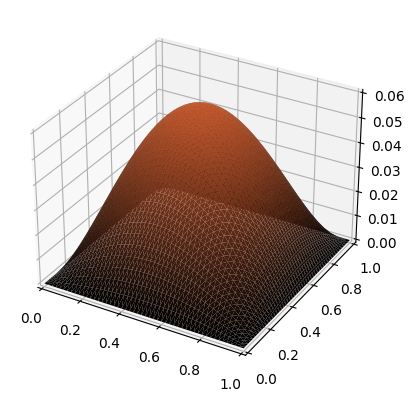

In [316]:

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(Poly3DCollection(poly3d,facecolors = col, linewidths=1))
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,0.06)
plt.show()

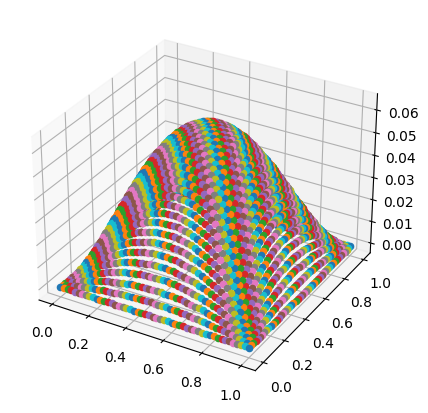

In [317]:

fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = '3d')
for i in range(0, so_nut):
    if(Dirichlet[i]):
        ax.scatter(nut[i][0],nut[i][1],0)
    else:
        q1= int(independ_re_index[i])
        ax.scatter(nut[i][0],nut[i][1], u_cord[q1])
plt.show()

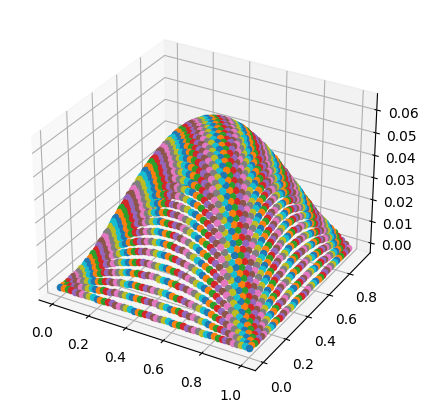

In [318]:

fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = '3d')
#def to_mau(x):
    #return x/0.6*
for i in range(0, run):
    if(Dirichlet[i]):
        ax.scatter(nut[i][0],nut[i][1],0)
    else:
        q1= int(independ_re_index[i])
        ax.scatter(nut[i][0],nut[i][1], u_cord[q1])
plt.show()

In [319]:
vui = np.array([1,2,3,4])
vui = vui*3
vui

array([ 3,  6,  9, 12])

In [320]:
#error
ve_phai = np.zeros(run)
def u_analytic(x,y):
    return x*(x-1)*y*(y-1)
def u_analytic2(x,y):
    return (x*(x-1)*y*(y-1))**2
error2 = 0
integral_unalytic = 0
for i in range(0, so_tam_giac):
    r1 = int(triangle[i][0])
    r2 = int(triangle[i][1])
    r3 = int(triangle[i][2])
    coef = np.zeros(3)
    for j in range(0, 3):
        p1 = int(triangle[i][j])
        if(Dirichlet[p1]==0):
            p2=0
            p3=0
            if(j==0):
                p2 = int(triangle[i][1])  
                p3 = int(triangle[i][2])  
            if(j==1):
                p2 = int(triangle[i][0])  
                p3 = int(triangle[i][2]) 
            if(j==2):
                p2 = int(triangle[i][1])  
                p3 = int(triangle[i][0])     
            q1 = int(independ_re_index[p1])
            coef += np.array(element_lib.Element_Linear_Polynomial_coef(nut[p1][0],nut[p1][1],
                                                                       nut[p2][0],nut[p2][1],
                                                                     nut[p3][0],nut[p3][1]))*u_cord[q1]
    error_con = lambda x,y: (coef[0]*x + coef[1]*y + coef[2]-u_analytic(x,y))**2
    integral_unalytic += gauss_quad_lib.integrate_gauss_quad_triangle(u_analytic2,nut[r1][0],nut[r1][1],
                                                                       nut[r2][0],nut[r2][1],
                                                                     nut[r3][0],nut[r3][1])
    error2 += gauss_quad_lib.integrate_gauss_quad_triangle(error_con,nut[r1][0],nut[r1][1],
                                                                       nut[r2][0],nut[r2][1],
                                                                     nut[r3][0],nut[r3][1])


In [321]:
np.sqrt(error2)

3.759651410176879e-05

In [322]:
integral_unalytic

0.0011111111111096013

In [323]:
integral_unalytic

0.0011111111111096013

In [324]:
vui = element_lib.Element_Linear_Polynomial_coef(0,0,0,1,1,0)
vui

array([-1., -1.,  1.])